In [3]:
from time import time
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import os
import shutil
import pandas as pd
import keras

In [2]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [45]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,
                                                                brightness_range=(0.6,1.4),rotation_range=20)
train_generator = train_datagen.flow_from_directory(
        "train/",
        target_size=(32, 32),
        batch_size=50,
        class_mode='sparse',
        classes=class_names,subset="training")

validation_generator = train_datagen.flow_from_directory(
        "train/",
        target_size=(32, 32),
        batch_size=50,
        class_mode='sparse',
        classes=class_names,subset="validation")

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [46]:
def split_dir():
    dataset = pd.read_csv("trainLabels.csv")
    file_names = list(dataset['id'].values)
    img_labels = list(dataset['label'].values)

    folders_to_be_created = np.unique(list(dataset['label']))
    for new_path in folders_to_be_created:
        if not os.path.exists("train/"+new_path):
            os.makedirs("train/"+new_path)

    folders = folders_to_be_created.copy()
    for f in range(len(file_names)):
        current_img = file_names[f]
        current_label = img_labels[f]
        shutil.move("train/"+str(current_img)+".png", "train/"+current_label)

In [49]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Activation('softmax'))

In [50]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

In [58]:
start=time()
history = model.fit(
        train_generator,
        steps_per_epoch=40000//50,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=10)
end=time()

Epoch 1/30
800/800 [==============================] - 378s 473ms/step - loss: 2.0189 - acc: 0.2442 - val_loss: 1.9715 - val_acc: 0.2420
Epoch 2/30
800/800 [==============================] - 306s 382ms/step - loss: 1.9716 - acc: 0.2659 - val_loss: 1.9534 - val_acc: 0.2800
Epoch 3/30
800/800 [==============================] - 311s 389ms/step - loss: 1.9452 - acc: 0.2775 - val_loss: 1.9386 - val_acc: 0.2800
Epoch 4/30
800/800 [==============================] - 310s 387ms/step - loss: 1.9170 - acc: 0.2900 - val_loss: 1.9210 - val_acc: 0.3120
Epoch 5/30
800/800 [==============================] - 306s 382ms/step - loss: 1.8992 - acc: 0.3030 - val_loss: 1.8138 - val_acc: 0.3220
Epoch 6/30
800/800 [==============================] - 360s 450ms/step - loss: 1.8753 - acc: 0.3081 - val_loss: 1.7884 - val_acc: 0.3340
Epoch 7/30
800/800 [==============================] - 430s 537ms/step - loss: 1.8746 - acc: 0.3081 - val_loss: 1.8617 - val_acc: 0.3300
Epoch 8/30
800/800 [============================

KeyboardInterrupt: 

In [52]:
print((end-start)//60)

19.0


In [53]:
def plot(losses, accuracies, subplot_title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
  
    ax1.plot(losses)
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    
    ax1.set_title(subplot_title[0])
  
    ax2.plot(accuracies)
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title(subplot_title[1])
    
    plt.show()

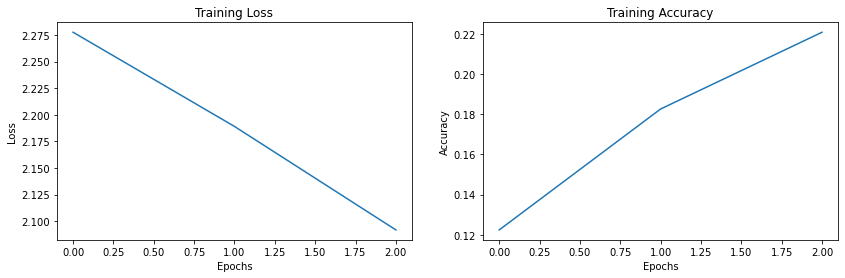

In [56]:
# Training
plot(history.history['loss'], 
     history.history['acc'], 
     subplot_title=['Training Loss', 'Training Accuracy']
    )

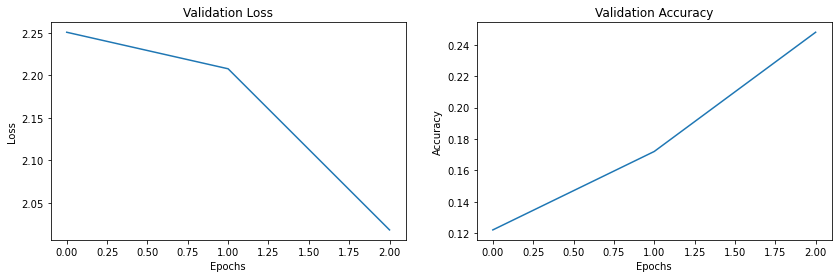

In [57]:
# Validation
plot(history.history['val_loss'], 
     history.history['val_acc'], 
     subplot_title=['Validation Loss', 'Validation Accuracy']
    )

In [22]:
resolution = 32

import numpy as np
from PIL import Image

X_data = []
files = os.listdir("test")
for my_file in files:
    image = Image.open("test/"+my_file).convert('RGB')
    image = np.array(image)
    X_data.append(image)

print('X_data shape:', np.array(X_data).shape)

X_data shape: (300000, 32, 32, 3)


In [25]:
img_all=np.array(X_data)

In [26]:
np.save("test_tensor.npy",img_all)

In [27]:
img_all=img_all.astype("int8")

In [28]:
np.save("test_tensor8.npy",img_all)

In [4]:
img_all=np.load("test_tensor8.npy")

In [5]:
img_all=img_all.astype("int16")

In [6]:
img_all=np.mod(img_all,256)

In [7]:
import matplotlib.pyplot as plt

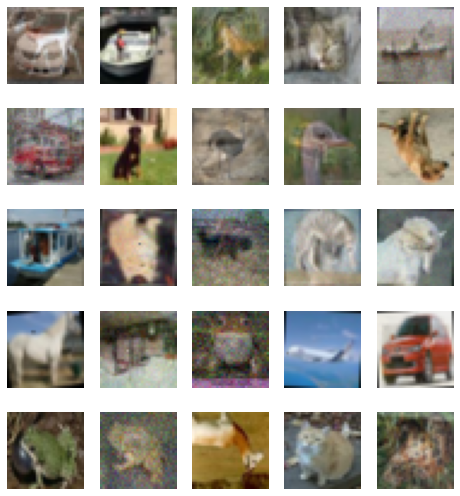

In [8]:
# pick 25 images and plot
idxs = np.arange(0,25)
images = img_all[idxs]
#labels = y_train[idxs]
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(5,5, figsize=(8,9))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.axis('off')
    #idx = labels[i]
    #ax.set_title(classnames[idx])
  
plt.show()

In [9]:
imported = tf.keras.models.load_model("model",compile=False)

In [10]:
imported.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [1]:
img_all=img_all/255

NameError: name 'img_all' is not defined

In [ ]:
predictions=imported.predict_classes(img_all)

In [21]:
classnames = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

In [23]:
predictions=classnames[predictions]

In [6]:
image_id=os.listdir("test")
image_id=np.array([x[:-4] for x in image_id])

In [8]:
np.save("image_id.npy",image_id)

In [38]:
solution=pd.DataFrame({"id" : image_id,
"label" : predictions})

In [39]:
solution.to_csv("submission.csv",index=False)